<a href="https://colab.research.google.com/github/anjalisrivastav604/CropDoc/blob/anjalisrivastav604-patch-1/Copy_of_thermal_anlysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

dataset_path = "/content/drive/MyDrive/CropDoc/backends/models/thermal images UL"
categories = os.listdir(dataset_path)
print("Disease Categories:", categories)

# Count number of images per category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    # Check if the item is a directory before attempting to list its contents
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        print(f"{category}: {num_images} images")
    else:
        print(f"{category}: is not a directory and will be skipped.") # Print a message to inform the user.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Disease Categories: ['BLB', 'Blast', 'healthy', 'hispa', 'Read Me - Oryza sativa - TImages.docx', 'leaf_spot', 'leaf_folder']
BLB: 220 images
Blast: 67 images
healthy: 93 images
hispa: 142 images
Read Me - Oryza sativa - TImages.docx: is not a directory and will be skipped.
leaf_spot: 80 images
leaf_folder: 34 images


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import json
from zipfile import ZipFile
!pip install kaggle


In [ ]:
import kaggle

kaggle_credentials = json.load(open(kaggle.json))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']


OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Define image size
IMG_SIZE = (224, 224)  # Resizing to match deep learning models
dataset_path = "/content/drive/MyDrive/CropDoc/backends/models/thermal images UL"  # Update this to your dataset's actual path
data_dir = dataset_path  # Change to your dataset folder path

# Check if the dataset path exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Dataset directory not found: {data_dir}")

# Initialize empty lists
X = []  # Image data
y = []  # Labels (0-5 for each disease type)

# Assign each category a numeric label
categories = ["BLB", "Blast", "leaf_spot", "leaf_folder", "hispa", "healthy"]

# Allowed image formats
image_extensions = {".jpg", ".jpeg", ".png", ".bmp"}

for category in categories:
    class_index = categories.index(category)  # Assign label (0-5)
    category_path = os.path.join(data_dir, category)

    # Check if category path exists
    if not os.path.exists(category_path):
        print(f"⚠️ Warning: Category directory not found: {category_path}. Skipping this category.")
        continue  # Skip to the next category

    # Count the number of images before processing
    total_images = len([f for f in os.listdir(category_path) if os.path.splitext(f)[-1].lower() in image_extensions])
    print(f"📂 Found {total_images} images in '{category}'")

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Check if the file is a valid image
        if os.path.splitext(img_name)[-1].lower() not in image_extensions:
            print(f"❌ Skipping non-image file: {img_name}")
            continue

        try:
            # Load image in grayscale (thermal data)
            img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')

            # Convert image to NumPy array
            img_array = img_to_array(img) / 255.0  # Normalize pixel values (0 to 1)

            X.append(img_array)
            y.append(class_index)

        except Exception as e:
            print(f"❌ Error loading image {img_name}: {e}")

# Convert to NumPy arrays
X = np.array(X)
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
from collections import Counter
from imblearn.over_sampling import RandomOverSampler  # Import RandomOverSampler

# Define image size
IMG_SIZE = (224, 224)  # Resizing to match deep learning models
dataset_path = "/content/drive/MyDrive/CropDoc/backends/models/thermal images UL"  # Update this to your dataset's actual path
data_dir = dataset_path  # Change to your dataset folder path

# Check if the dataset path exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Dataset directory not found: {data_dir}")

# Initialize empty lists
X = []  # Image data
y = []  # Labels (0-5 for each disease type)

# Assign each category a numeric label
categories = ["BLB", "Blast", "leaf_spot", "leaf_folder", "hispa", "healthy"]

# Allowed image formats
image_extensions = {".jpg", ".jpeg", ".png", ".bmp"}

for category in categories:
    class_index = categories.index(category)  # Assign label (0-5)
    category_path = os.path.join(data_dir, category)

    # Check if category path exists
    if not os.path.exists(category_path):
        print(f"⚠️ Warning: Category directory not found: {category_path}. Skipping this category.")
        continue  # Skip to the next category

    # Count the number of images before processing
    total_images = len([f for f in os.listdir(category_path) if os.path.splitext(f)[-1].lower() in image_extensions])
    print(f"📂 Found {total_images} images in '{category}'")

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Check if the file is a valid image
        if os.path.splitext(img_name)[-1].lower() not in image_extensions:
            print(f"❌ Skipping non-image file: {img_name}")
            continue

        try:
            # Load image in grayscale (thermal data)
            img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')

            # Convert image to NumPy array
            img_array = img_to_array(img) / 255.0  # Normalize pixel values (0 to 1)

            X.append(img_array)
            y.append(class_index)

        except Exception as e:
            print(f"❌ Error loading image {img_name}: {e}")

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"✅ Successfully loaded {len(X)} images from all categories!")

# Reshape X for compatibility with resampling
X_reshaped = X.reshape(len(X), -1)  # Flatten images

# Perform oversampling
ros = RandomOverSampler(random_state=42)  # Create a RandomOverSampler instance
X_resampled, y_resampled = ros.fit_resample(X_reshaped, y)  # Oversample

# Reshape X back to image format
X_resampled = X_resampled.reshape(-1, 224, 224, 1)  # Reshape to original dimensions

print("✅ Resampling completed.")
print("🔢 New class distribution:", Counter(y_resampled))

# Convert back to NumPy arrays
X = np.array(X_resampled)
y = np.array(y_resampled)
# Convert resampled labels to categorical (one-hot encoding)
y_resampled = to_categorical(y_resampled, num_classes=len(categories))

print("✅ Labels one-hot encoded successfully!")

# Split resampled dataset into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"✅ Training Images: {len(X_train)}, Testing Images: {len(X_test)}")

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)),  # Grayscale input
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output 6 classes
])

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

# --- Compute Class Weights ---
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.argmax(axis=1)),  # Convert one-hot to class indices
    y=y_train.argmax(axis=1)  # Convert one-hot to class indices
)

# Convert to dictionary format required for training
class_weights = dict(enumerate(class_weights))

# --- Train the model with Class Weights ---
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=26,
    validation_data=(X_test, y_test),
    class_weight=class_weights,  # Apply class weights
    verbose=1
)
# Save it


# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

# Reshape X for compatibility with resampling
X_reshaped = X.reshape(len(X), -1)  # Flatten images

# Perform oversampling
ros = RandomOverSampler(random_state=42)  # Create a RandomOverSampler instance
X_resampled, y_resampled = ros.fit_resample(X_reshaped, y)  # Oversample

# Reshape X back to image format
X_resampled = X_resampled.reshape(-1, 224, 224, 1)  # Reshape to original dimensions

print("✅ Resampling completed.")
print("🔢 New class distribution:", Counter(y_resampled))

# Convert back to NumPy arrays
X = np.array(X_resampled)
y = np.array(y_resampled)
# Convert resampled labels to categorical (one-hot encoding)
y_resampled = to_categorical(y_resampled, num_classes=len(categories))

print("✅ Labels one-hot encoded successfully!")

# Split resampled dataset into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"✅ Training Images: {len(X_train)}, Testing Images: {len(X_test)}")

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
from tensorflow.keras.models import load_model



# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)),  # Grayscale input
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output 6 classes
])

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

# --- Compute Class Weights ---
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.argmax(axis=1)),  # Convert one-hot to class indices
    y=y_train.argmax(axis=1)  # Convert one-hot to class indices
)

# Convert to dictionary format required for training
class_weights = dict(enumerate(class_weights))

# --- Train the model with Class Weights ---
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=25,
    validation_data=(X_test, y_test),
    class_weight=class_weights,  # Apply class weights
    verbose=1
)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 Found 220 images in 'BLB'
📂 Found 67 images in 'Blast'
📂 Found 80 images in 'leaf_spot'
📂 Found 34 images in 'leaf_folder'
📂 Found 142 images in 'hispa'
📂 Found 93 images in 'healthy'
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 Found 220 images in 'BLB'
📂 Found 67 images in 'Blast'
📂 Found 80 images in 'leaf_spot'
📂 Found 34 images in 'leaf_folder'
📂 Found 142 images in 'hispa'
📂 Found 93 images in 'healthy'
✅ Successfully loaded 636 images from all categories!
✅ Resampling completed.
🔢 New class distribution: Counter({np.int64(0): 220, np.int64(1): 220, np.int64(2): 220, np.int64(3): 220, np.int64(4): 220, np.int64(5): 220})
✅ Labels one-hot encoded successfully!
✅ Training Images: 1056, Testing Images: 264


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,398,598 (169.37 MB)

 Trainable params: 44,398,598 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.2817 - loss: 1.9333 - val_accuracy: 0.7424 - val_loss: 0.7246
Epoch 2/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.7389 - loss: 0.7439 - val_accuracy: 0.8409 - val_loss: 0.5192
Epoch 3/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.8248 - loss: 0.5271 - val_accuracy: 0.9053 - val_loss: 0.3336
Epoch 4/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8775 - loss: 0.3755 - val_accuracy: 0.8864 - val_loss: 0.3026
Epoch 5/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.9142 - loss: 0.2769 - val_accuracy: 0.8712 - val_loss: 0.2855
Epoch 6/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.9028 - loss: 0.2686 - val_accuracy: 0.9356 - val_loss: 0.1775
Epoch 7/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.9536 - loss: 0.1248 - val_accuracy: 0.9470 - val_loss: 0.1873
Epoch 8/26
66/66 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9556 - loss: 0.1251 - val_accuracy: 0.950

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,398,598 (169.37 MB)

 Trainable params: 44,398,598 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.2034 - loss: 2.0158 - val_accuracy: 0.6402 - val_loss: 1.0234
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.6348 - loss: 0.9708 - val_accuracy: 0.7652 - val_loss: 0.5840
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.7916 - loss: 0.5613 - val_accuracy: 0.8826 - val_loss: 0.3482
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.8857 - loss: 0.3455 - val_accuracy: 0.9205 - val_loss: 0.2161
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9005 - loss: 0.2994 - val_accuracy: 0.9318 - val_loss: 0.1807
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.9188 - loss: 0.1998 - val_accuracy: 0.9356 - val_loss: 0.1603
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9535 - loss: 0.1500 - val_accuracy: 0.9053 - val_loss: 0.1993
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.9515 - loss: 0.1357 - val_accuracy: 0.969

In [ ]:
from tensorflow.keras.models import load_model


# Save it
model.save("thermal_analysis_model.keras")


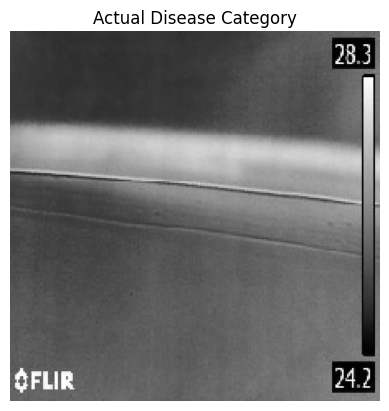

In [ ]:
import random
import matplotlib.pyplot as plt

# Pick a random test image
random_index = random.randint(0, len(X_test) - 1)
test_image = X_test[random_index]
test_label = y_test[random_index]

# Display the image
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title("Actual Disease Category")
plt.axis("off")
plt.show()


In [ ]:
import numpy as np

def predict_image(img_array):
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the index of max probability
    return categories[predicted_class]  # Convert index to class name

# Run the prediction
predicted_disease = predict_image(test_image)
print(f"Predicted Disease: {predicted_disease}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Predicted Disease: leaf_spot


In [ ]:
def predict_image(image_path):
    img = load_img("/content/drive/MyDrive/thermal analysis/thermal images UL/Blast/Thermalimagex.jpg", target_size=IMG_SIZE, color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    return predicted_class

test_img_path = "/content/drive/MyDrive/thermal analysis/thermal images UL/Blast/thermalimage.jpg"
print("Predicted Disease:", predict_image(test_img_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Disease: Blast


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


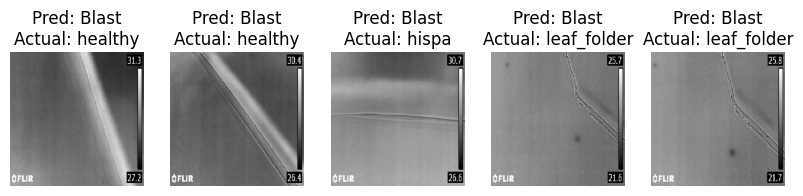

In [ ]:
# Pick 5 random test images
num_samples = 5
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(10, 5))

for i, idx in enumerate(sample_indices):
    img = X_test[idx]
    actual_label = categories[np.argmax(y_test[idx])]
    predicted_label = predict_image(img)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")
    plt.axis("off")

plt.show()


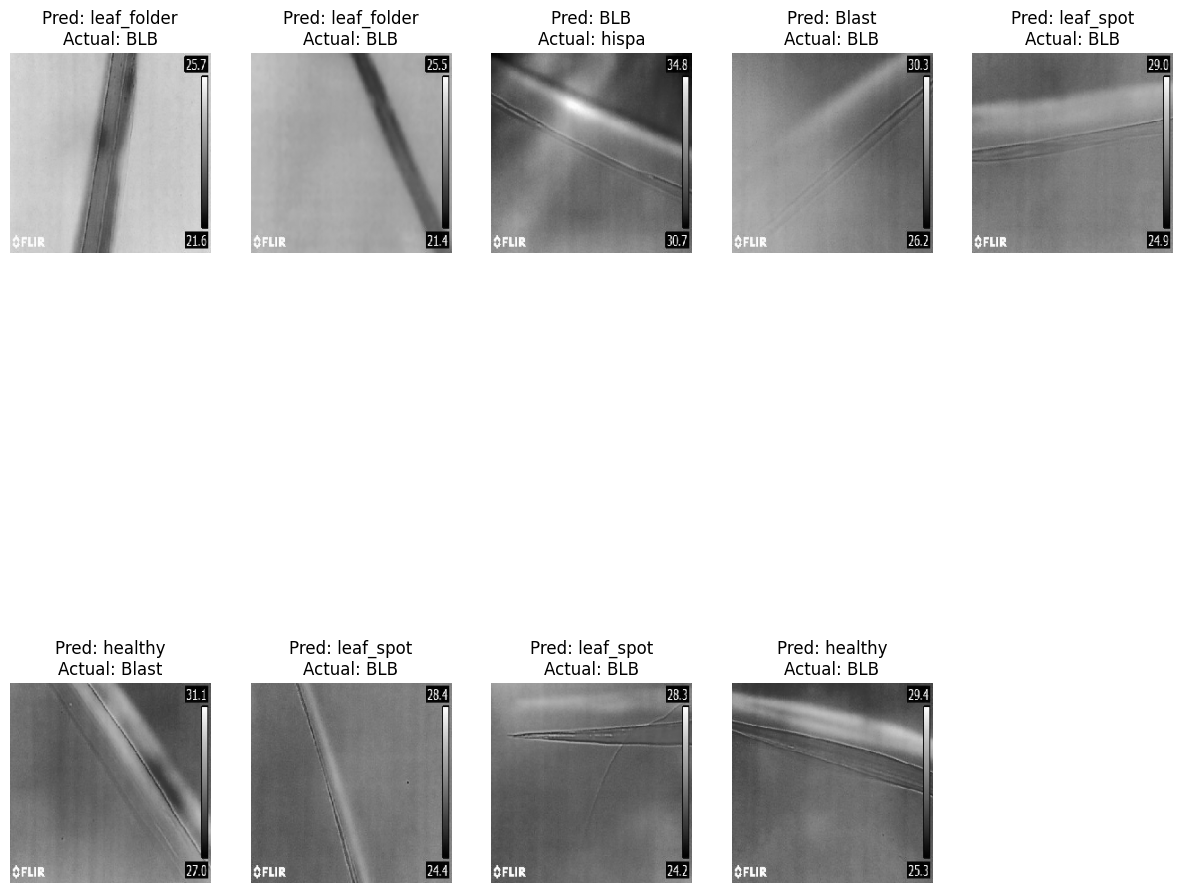

In [ ]:
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

plt.figure(figsize=(15, 15))
num_errors = len(incorrect_indices)  # Show all errors

for i, idx in enumerate(incorrect_indices[:num_errors]):
    img = X_test[idx]
    actual_label = categories[y_true_classes[idx]]
    predicted_label = categories[y_pred_classes[idx]]

    plt.subplot((num_errors // 5) + 1, 5, i + 1)  # Adjust grid layout dynamically
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")
    plt.axis("off")

plt.show()
